With this notebook we are going to demostrate two different examples of searhc queries that showcase how our implementation transforms and tries to fill in the missing values in each initial Google Trends "Interest over time" timeline

In [1]:
import google_trends as gt
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (25,6)

A search query that has lots of missing values that are labeled as 0 by Google

In [5]:
start = datetime(2014,1,1)
end = datetime(2014,6,30)
query='hilton hotel'
test = gt.Query(query=query, start=start, end=end, days=7)

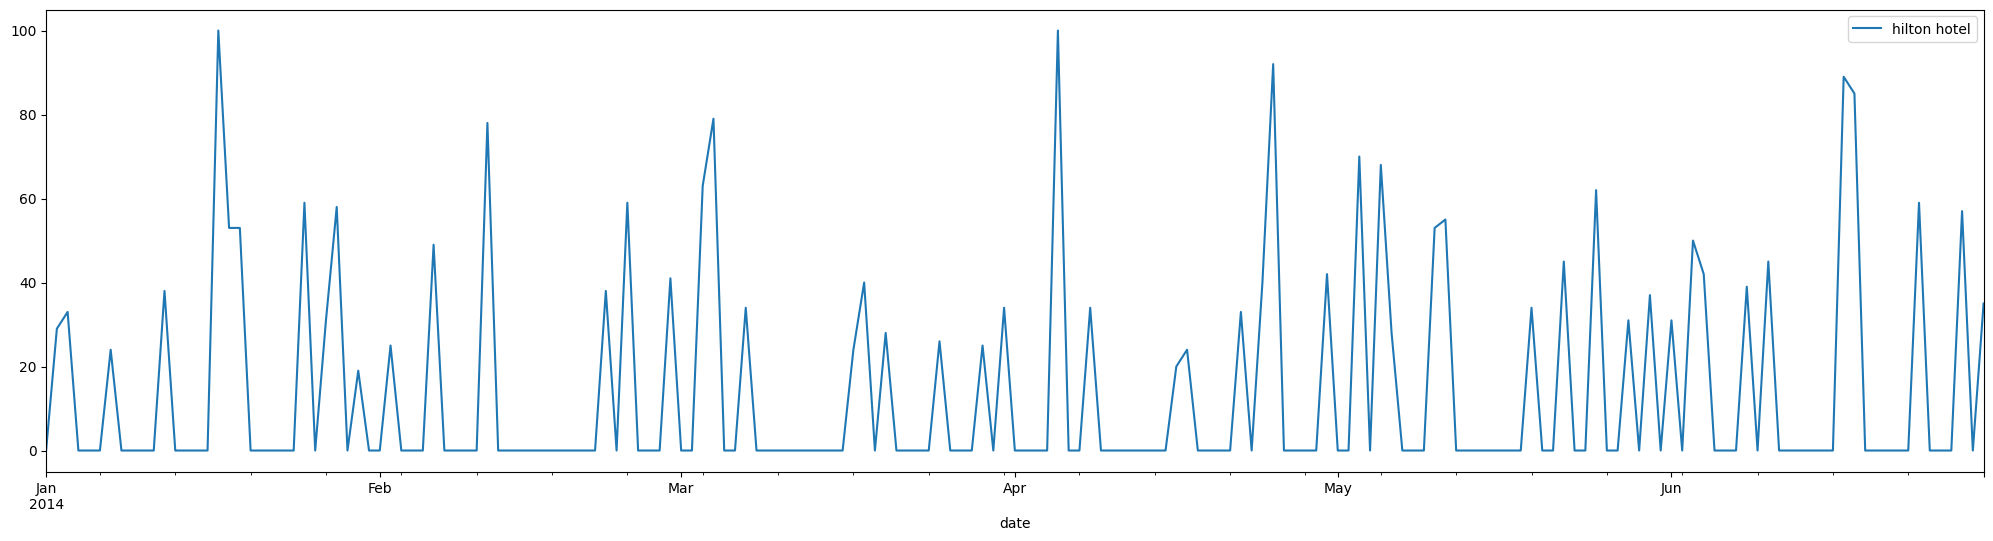

In [6]:
test.timeline.plot()
plt.show()

In [7]:
rescaled_test = test.rescale(test.timeline, start, end, query)

1/1 [==============================] - 0s 11ms/step


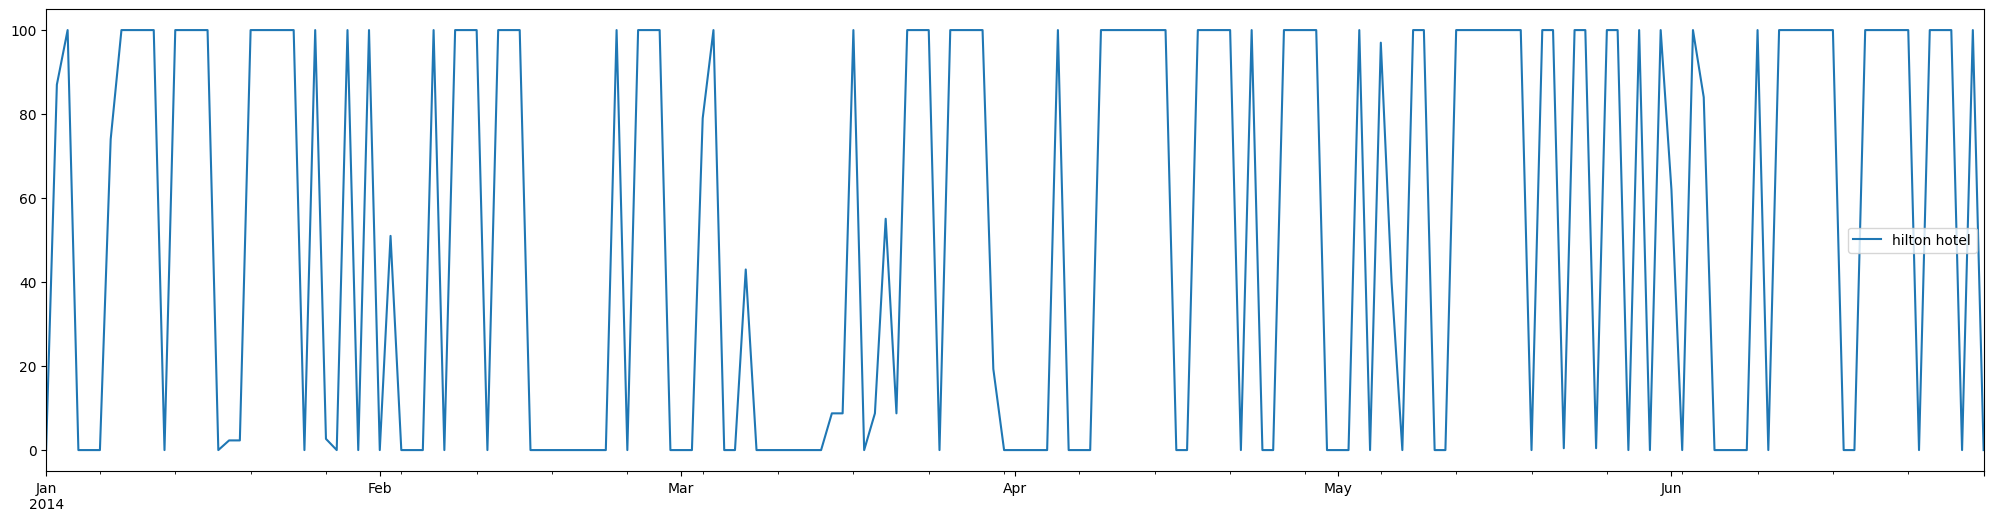

In [8]:
rescaled_test.plot()
plt.show()

In [9]:
error = gt.ErrorWrapper.error(rescaled_test, test.timeline, case='r2')
print(error)

-1.208114990277679


In [10]:
error = gt.ErrorWrapper.error(rescaled_test, test.timeline, case='pearson')
print(error)

PearsonRResult(statistic=-0.304751473695755, pvalue=3.029132137878545e-05)


In [11]:
start = datetime(2014,1,1)
end = datetime(2014,6,30)
query='athens hotel'
test = gt.Query(query=query, start=start, end=end, days=7)

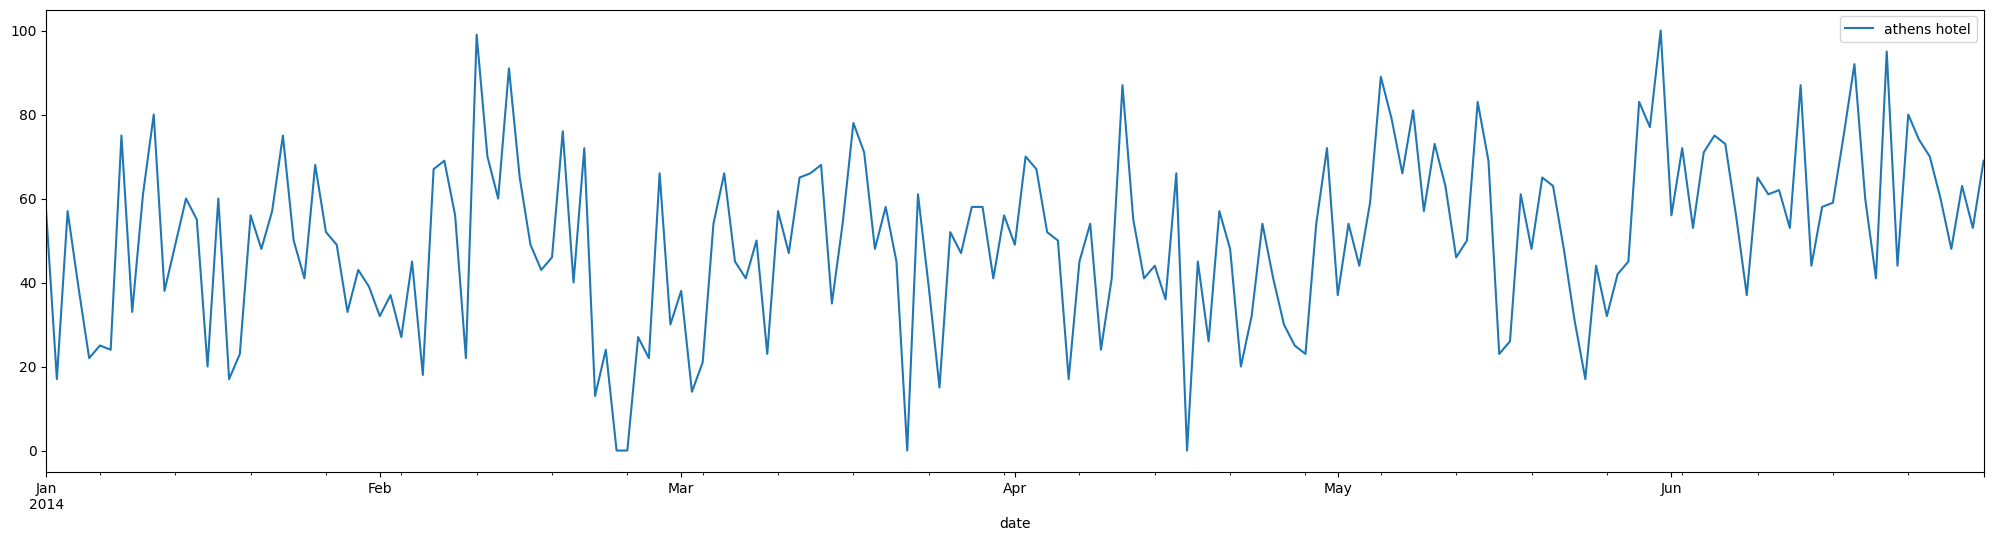

In [12]:
test.timeline.plot()
plt.show()

In [13]:
rescaled_test = test.rescale(test.timeline, start, end, query)

1/1 [==============================] - 0s 12ms/step


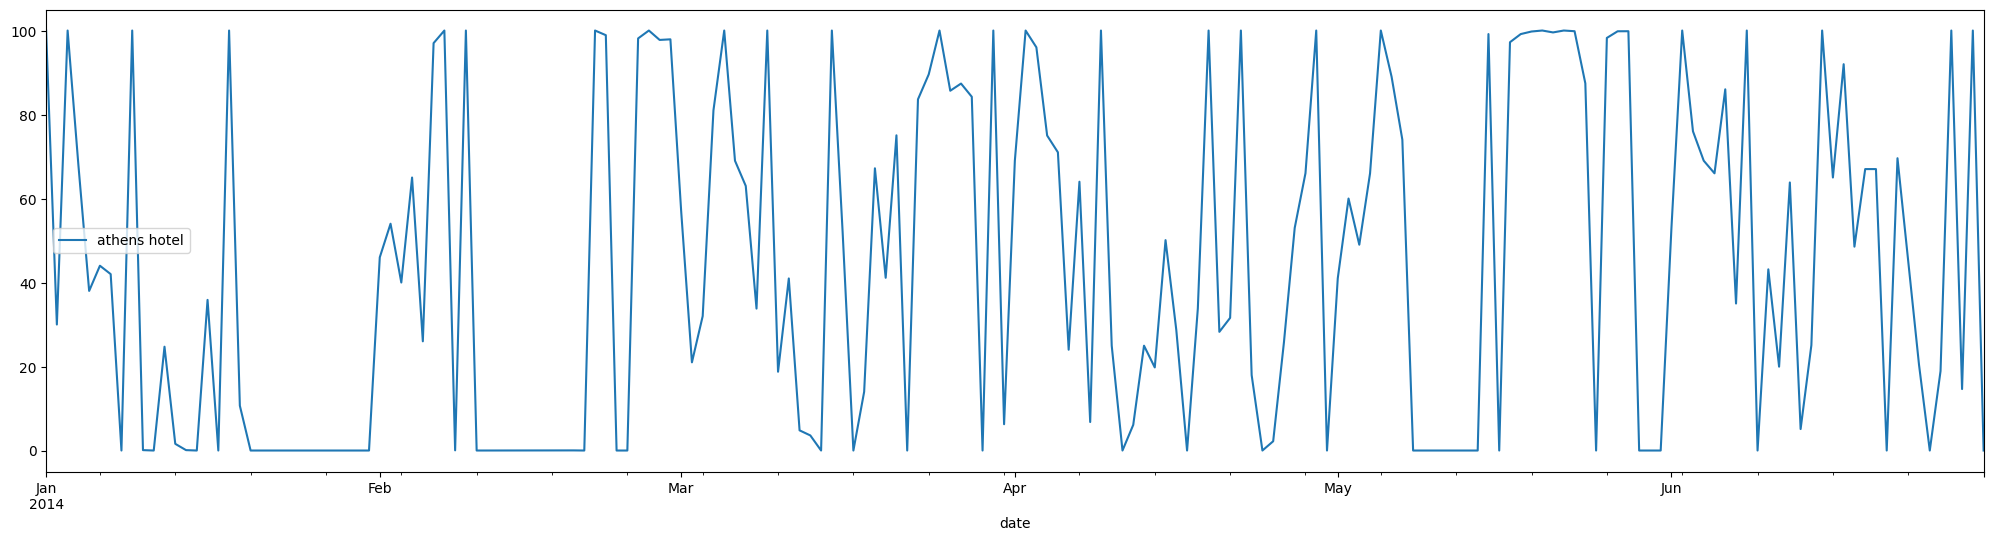

In [14]:
rescaled_test.plot()
plt.show()

Even when there are very few missing values in our initial timeline our model fails to fill in the smaller gaps and <b>creates</b> even more as a matter of fact

In [15]:
error = gt.ErrorWrapper.error(rescaled_test, test.timeline, case='r2')
print(error)

-0.4915425514933671


In [16]:
error = gt.ErrorWrapper.error(rescaled_test, test.timeline, case='pearson')
print(error)

PearsonRResult(statistic=-0.19939752190165608, pvalue=0.007121416306211985)
